# DA5401 A5: Visualizing Data Veracity Challenges in Multi-Label Classification

##### Name : Kaki Hephzi Sunanda
##### Roll Number : DA25M015

**Given Objective:**

This assignment aims to deepen your understanding of the challenges in real-world machine learning, specifically in **multi-label classification**, by utilizing advanced non-linear dimensionality reduction techniques such as **t-SNE** and **Isomap**. You will visually inspect the data for issues such as
noisy labels, outliers, and hard-to-learn data points, sparking curiosity about **data veracity** in a biological context.

## Problem Statement

You are a data scientist analyzing gene expression data. You have been given the **Yeast Dataset**, where each data point (instance) represents an experiment, and the features are gene expression levels. The target is a set of **14 functional categories (labels)** to which the gene product may belong (multi-label classification). This dataset, despite being standardized, can still exhibit data veracity issues:

1. **Noisy/Ambiguous Labels**: Genes whose functions span multiple categories or are misclassified.
2. **Outliers**: Experiments with highly unusual gene expression profiles.
3. **Hard-to-Learn Samples**: Data points lying in regions where functional categories are thoroughly mixed.

Your task is to apply t-SNE and Isomap to the feature vectors to visually expose these data quality issues, thereby understanding the challenges a classifier would face.

You will submit a Jupyter Notebook with your complete code, visualizations, and a plausible story that explains your findings. The notebook should be well-commented, reproducible, and easy to follow.

**Dataset**:
- Yeast Dataset: The feature matrix X and the binary multi-label matrix Y (with 14 labels) are standard files available from the **Mulan Repository** or other machine learning data repositories.
- **Download Link (Example Source - use the text files)**: [MULAN Repository - Yeast Data](https://mulan.sourceforge.net/datasets-mlc.html) (Look for <span style="color:lightgreen">**yeast.arff**</span> and the corresponding label file, or a pre-converted CSV/NumPy format).

### About the Dataset

- This dataset contains genes from **Saccharomyces cerevisiae (yeast)**.

<p align="center"><img src="https://media.istockphoto.com/id/1325421302/photo/probiotic-yeast-saccharomyces-cerevisiae.jpg?s=612x612&w=0&k=20&c=lW02S33uATJ_YJZiFNAT5FdwGhCPvKpgGybNWMX7jpI=" width="600"/></p>

- Each row represents one gene described by **103 numeric features** built from **DNA microarray expression levels** (measured under the diauxic shift, mitotic cell division cycle, sporulation, and temperature-reduction shock conditions) together with a **phylogenetic profile** (evolutionary presence/absence information).
- Labels follow the first-level functional class hierarchy curated by the Munich Information Center for Protein Sequences (MIPS).
- A gene may belong to multiple classes.

**<u>Dataset Details:</u>**
- Total samples: 2,417 genes
- Number of features: 117 &#8594; 103 features + 14 label indicators
	- Feature Sources:
		- DNA microarray expression recorded under: diauxic shift (fermentation &#8594; respiration), mitotic cell division cycle, sporulation, and temperature-reduction shocks
		- Phylogenetic profile summarizing evolutionary relationships
- Feature type: numeric (real-valued)
- Label type: multi-label binary indicators (0/1)

**<u>Dataset Attributes:</u>**


| Attribute | Type | Description | Values |
|---|---|---|---|
| **Att1–Att103** | Numeric features | DNA microarray expression levels under diauxic shift, mitotic cell cycle, sporulation, temperature-reduction shocks + phylogenetic profile | Real-valued |
| **Class1** | Label | Metabolism | 0/1 |
| **Class2** | Label | Energy | 0/1 |
| **Class3** | Label | Cell growth, cell division, DNA synthesis | 0/1 |
| **Class4** | Label | Transcription | 0/1 |
| **Class5** | Label | Protein synthesis | 0/1 |
| **Class6** | Label | Protein destination | 0/1 |
| **Class7** | Label | Transport facilitation | 0/1 |
| **Class8** | Label | Cellular transport / transport mechanisms | 0/1 |
| **Class9** | Label | Cellular biogenesis | 0/1 |
| **Class10** | Label | Ionic homeostasis | 0/1 |
| **Class11** | Label | Cellular organization | 0/1 |
| **Class12** | Label | Transposable elements / viral & plasmid proteins | 0/1 |
| **Class13** | Label | Cell rescue, defense, cell death & aging | 0/1 |
| **Class14** | Label | Cell communication & signal transduction | 0/1 |



**NOTE:**

Expression profiles were recorded across four standard biological contexts:
- Diauxic shift (switch from fermentation to respiration)
- Mitotic cell division cycle
- Sporulation
- Temperature-reduction shocks

---

*source*: A. Elisseeff and J. Weston. A kernel method for multi-labelled classification. In T.G. Dietterich, S. Becker, and Z. Ghahramani, (eds), Advances in Neural Information Processing Systems 14, 2001.


## Part A : Preprocessing and Initial Setup

### Question 1 : Data Loading

Load the feature matrix X (103 features) and the multi-label target matrix Y (14 labels).

In [1]:
# Reset the environment.

%reset -f

In [2]:
# Import Necessary Libraries.

from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

In [3]:
# Load ARFF dataset into a pandas DataFrame.

data_path = "yeast.arff" # file path to the ARFF dataset.

data = loadarff(data_path) # read the ARFF file.
data = pd.DataFrame(data[0]) # convert the record array to a pandas DataFrame.

In [4]:
# Preview of the dataset.

data.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


### Question 2 : Dimensionality Check

Report the initial number of features and the number of data points.

In [5]:
print("Number of Initial Features: ", data.shape[1])
print("Number of Data Points: ", data.shape[0])

Number of Initial Features:  117
Number of Data Points:  2417


### Question 3 : Label Selection for Visualization

To simplify the visualization (since 14 colors can be overwhelming), create a new target variable for coloring that represents the **two most frequent single-label classes** and the **most frequent multi-label combination**. Assign an "Other" category to the rest. This approach creates a simple, distinct categorical index for coloring the plots.

In [6]:
# About the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Columns: 117 entries, Att1 to Class14
dtypes: float64(103), object(14)
memory usage: 2.2+ MB


- From the above information on the dataset, we can see that the Label columns are loaded as object byte-strings - b'0' / b'1'.
- For analysis, they need to be converted to numeric integers - 0 / 1.

In [7]:
# Split column names into features and label columns.

feature_cols_list = data.columns[:-14] # Numeric Features.
class_cols_list = data.columns[-14:] # Multi-label columns.

In [8]:
# Convert label columns to integer 0/1.

data[class_cols_list] = data[class_cols_list].astype(str).astype('int8')

In [9]:
# Masks for the top single-label classes.

single_mask  = data[class_cols_list].sum(axis=1) == 1

In [10]:
# Count per-class frequency among single-label rows and pick top 2.

data.loc[single_mask, class_cols_list].sum(axis=0)

Class1     32
Class2      0
Class3      0
Class4      0
Class5      0
Class6      0
Class7      0
Class8      0
Class9      0
Class10     0
Class11     0
Class12     0
Class13     0
Class14     0
dtype: int64

- The code `single_mask = (row sum across 14 labels == 1)` filters rows that have **exactly one** active label.
- Summing the columns within `single_mask` gives counts per class among **single-label rows**.
- Only **Class1** has a non-zero count of **`32`**, all other classes are **`0`**.
- The question asks for the **two most frequent single-label classes**, but the dataset contains **only one** such class ,i.e., **`Class1`**.
- Thus, in the subsequent analysis, `Class1` is the only class used as the **most frequent single-label class**.
- There is no valid second most frequent single-label class.  

In [11]:
# Rank unique label combinations by frequency.

combinations = data[class_cols_list].value_counts()
combinations

Class1  Class2  Class3  Class4  Class5  Class6  Class7  Class8  Class9  Class10  Class11  Class12  Class13  Class14
0       0       1       1       0       0       0       0       0       0        0        1        1        0          237
                0       1       1       0       0       0       0       0        0        1        1        0          233
1       1       0       0       0       0       0       0       0       0        0        1        1        0          172
                                                                                          0        0        0          131
0       1       1       0       0       0       0       0       0       0        0        1        1        0          117
                                                                                                                      ... 
1       1       1       1       1       0       0       0       0       0        0        0        0        0            1
                       

In [12]:
most_freq_comb = combinations.index[0]  # the top-ranked 14-label pattern.
multi_mask  = data[class_cols_list].eq(pd.Series(most_freq_comb, index=class_cols_list)).all(1) # row-wise exact-match mask.

- The code `combinations = data[class_cols_list].value_counts()` ranks **unique 14-label combinations** by **frequency**.
- Each index entry is a full **label vector** across `Class1 … Class14`, each value is the **count** of rows with that exact vector.
- The output shows **198** distinct combinations and the top few combinations occur **237**, **233**, **172**, **131**, and **117** times.
- The highest-frequency pattern is `00110000000110`.
- For the question, the **most frequent multi-label combination** is selected.
- A row-wise **exact-match mask** (here, `muti_mask`) is built to mark all rows equal to that top combination.
- All rows not in `multi_mask` and not in the chosen `single_mask` buckets are assigned to **Other**, producing a compact coloring index.

In [13]:
# Create a new label column and store the new label assignments.

data.loc[:,"Class"]= 0 # initialize simplified Label. 0 = Other for all rows.
data.loc[single_mask,"Class"] = 1 # set 1 for rows with exactly one active label (only class 1).
data.loc[multi_mask,"Class"] = 2 # set 2 for rows matching the top multi-label combination.

data["Class"] = data["Class"].astype(int)  # store as integers.

In [14]:
# Preview the data.

data.head()

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14,Class
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0,1,1,0,0,0,1,1,0,0
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0,0,0,0,0,0,0,0,0,0
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0,0,0,0,0,0,1,1,0,0
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,0,0,0,0,0,0,0,0,0,0
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,1,0,0,0,0,0,0,0,0,0


In [15]:
# Split into features (X) and multi-label targets (y).

X = data[feature_cols_list].to_numpy() # Select the 103 numeric feature columns.
y = data[class_cols_list].to_numpy() # Select the 14 binary label columns.
y_new = data["Class"].to_numpy() # Select the final label column.

### Question 4 : Scaling 

Explain why scaling is crucial before applying distance-based dimensionality reduction techniques. Apply Standardization to the feature matrix X.

**<u>Why **scaling** is crucial for distance-based dimensionality reduction:</u>**

- The methods such as **t-SNE**, **Isomap** rely on **pairwise distances** thus features with larger **scale** dominate the distance..
- With mixed sources for gene expression in the data structure such as microarray **expression** + **phylogenetic** profile, features are in **different units**.
- These unscaled features which are in different units, can produce **false neighbors**.
- Since **Neighbor selection** is distance-based, t-SNE builds local probabilities from Euclidean distances and Isomap builds a **k-NN graph**.
- Thus, Wrong scales can lead to **wrong neighborhoods**.
- t-SNE tunes a local **bandwidth** per point to match **perplexity** so if distances are inflated by scale, σ and perplexity calibration become **unstable**.
- Scaling improves **stability** and makes plots **comparable** across perplexities and algorithms.
- Therefore, the feature matrix `X` is **standardized** (zero mean, unit variance) before t-SNE or Isomap.

In [16]:
# Standardize features.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler() # Initialize the Model. 
X_scaled = ss.fit_transform(X) # Fit the model on the features data to produce standardized features.

In [17]:
# Standardization Check.

print("Mean of the data before scaling: ", X.mean().round(2))
print("Standard deviation of the data before scaling: ", X.std().round(2))

print("\n\nMean of the data after scaling: ", X_scaled.mean().round(2))
print("Standard deviation of the data after scaling: ", X_scaled.std().round(2))

Mean of the data before scaling:  0.0
Standard deviation of the data before scaling:  0.1


Mean of the data after scaling:  0.0
Standard deviation of the data after scaling:  1.0


- The assignment states that the Yeast dataset is already **standardized**.
- Before scaling, mean is **`0.0`**, std is **`0.1`** which is consistent with pre-standardized features.
- After applying `StandardScaler`: mean is **`0.0`**, std is **`1.0`** which enforces strict zero-mean, unit-variance in our pipeline.
- The extra scaling is kept to make the pipeline self-contained, reproducible, and consistent across train-test splits.
- Standardization affects only feature scale, it does not fix noisy or ambiguous labels, outliers, or hard-to-learn regions mentioned in the assignment.

## Part B : t-SNE and Veracity Inspection

### Question 1 : t-SNE Implementation

Apply **t-Distributed Stochastic Neighbor Embedding (t-SNE)** to the scaled feature matrix X to reduce it to 2 dimensions. Experiment with the **perplexity**
hyperparameter (e.g., 5, 30, 50) and note how the visualization changes. Justify your final choice of perplexity.

In [18]:
# Import TSNE Class from the manifold module in the sklearn library.
from sklearn.manifold import TSNE

# Compute t-SNE embeddings for multiple perplexities

pvals = [5,10,15,20,30,50] # candidate perplexity values.

tsne_trans = [] # Store one t-SNE 2D embedding per perplexity.

for i, p in enumerate(pvals):
	model = TSNE(n_components = 2, # target 2D embedding
              	perplexity=p, # effective neighbors to consider
               	max_iter=5000, # iterations for convergence
                init='pca', # PCA initialization
                random_state = 0) # fix seed
	tsne_data = model.fit_transform(X_scaled) # fit on standardized features
	tsne_trans.append(tsne_data) # Store current embedding

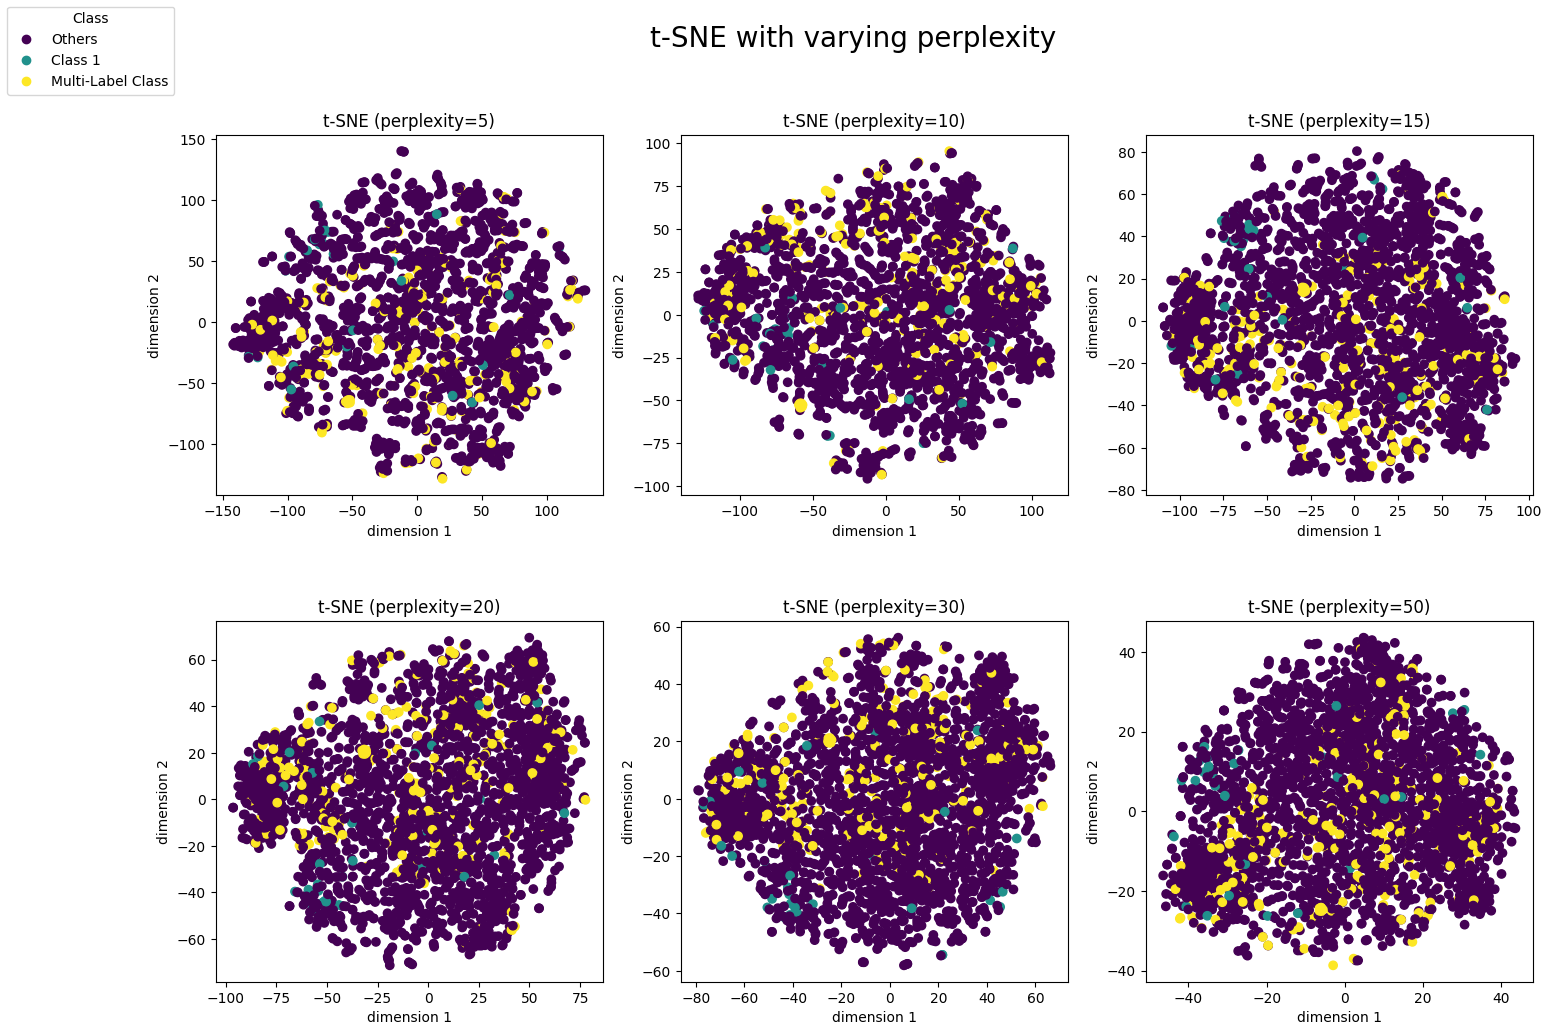

In [19]:
# Plot the t-SNE embeddings

fig, ax = plt.subplots(nrows = 2, ncols=3, figsize=(17,11)) # 2×3 grid of subplots
ax = ax.ravel() # flatten axes array for indexing

for i, p in enumerate(pvals): 
	sc = ax[i].scatter(tsne_trans[i][:,0], tsne_trans[i][:,1], c = y_new) # scatter each embedding
	ax[i].set_title(f"t-SNE (perplexity={p})") # subplot title
	ax[i].set_xlabel("dimension 1") # x-axis label
	ax[i].set_ylabel("dimension 2") # y-axis label
         
handles, labels = sc.legend_elements() # create legend entries
labels = [int(item.strip(r'$\mathdefault{}')) for item in labels]
label_map = {0:"Others",
             1:"Class 1",
             2:"Multi-Label Class"}
labels_str = [label_map[val] for val in labels]
plt.suptitle("t-SNE with varying perplexity", fontsize=20) # overall figure title
plt.subplots_adjust(hspace=0.35, wspace=0.2) # spacing between panels
fig.legend(handles, labels_str, title="Class", loc="upper left") # shared legend for all panels
plt.show()

- The final perplexity is chosen as **`30`**.
- This value gives a **stable** embedding and is balanced between local and global structure.
- t-SNE is **unsupervised** and preserves neighborhoods present in the original feature space and it does not enforce label-based separation.
- The simplified labels are **not geometrically separable** in the features, so neighborhoods already contain mixed labels.
- There is **high class imbalance** in the dataset after generating simplified labels, with `Others` having the most number of datapoints and `Class 1` and `Multi-Class` having `32` and `237` data points respectively.
- The **`Others`** label is **heterogeneous and large**, so its points appear **throughout** the map and visually surround the minority classes.
- The **single-label bucket** has **very few points** ,i.e., Class 1 has **32** data points, which is insufficient to form a strong, isolated cluster in 2D.
- Varying the perplexity over the tested values yields **similar, mixed groups** and tuning perplexity **does not** create separation in the data.
- Therefore, **perplexity = 30** is a stable choice, and the lack of clear class separation is a property of the final labeled data.

### Question 2 : Visualization

- Create a 2D scatter plot of the final t-SNE coordinates.
- Color each data point according to the categorical index you created in Part A.

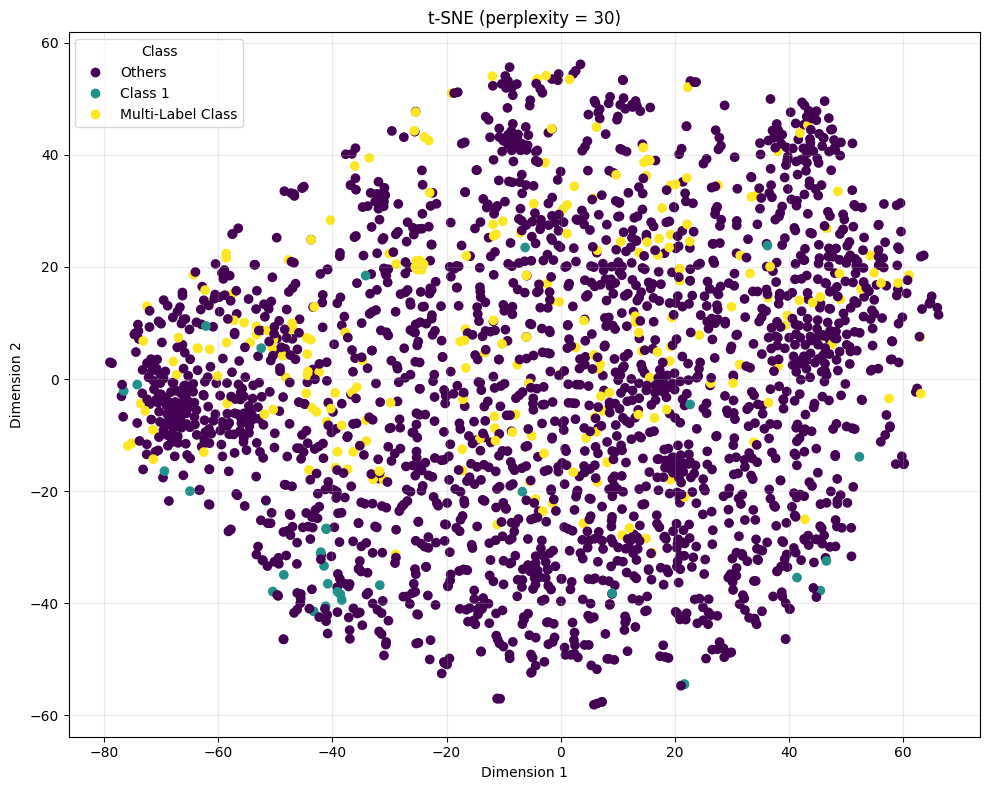

In [20]:
# Plot of the t-SNE embeddings for perplexity=30.

idx = pvals.index(30)
fig, ax = plt.subplots(figsize=(10, 8))
sc = ax.scatter(tsne_trans[idx][:, 0], tsne_trans[idx][:, 1], c=y_new)  # color by simplified labels
ax.set_title("t-SNE (perplexity = 30)") #  title
ax.set_xlabel("Dimension 1") # x-axis labels
ax.set_ylabel("Dimension 2") # y-axis labels
ax.grid(alpha=0.25) # grid

ax.legend(handles, labels_str, title="Class", loc="best")  # legend 
plt.tight_layout()
plt.show()

### Question 3 : Veracity Inspection

- Analyze the resulting plot and visually identify regions corresponding to:
	- **Noisy/Ambiguous Labels**: Points where one color is deeply embedded within a cluster of a different color.
	- **Outliers**: Isolated points or tiny, distant clusters. Hypothesize what these unusual expression patterns might represent.
	- **Hard-to-Learn Samples**: Areas where functional category colors are thoroughly mixed. Explain why a simple classifier would likely struggle in these regions.

- **Noisy / Ambiguous labels**:
	- The plot shows **yellow** (Multi-Label Class) and **teal** (Class 1) points **embedded inside** the large **purple** cloud (Other).
	- Local neighborhoods contain **mixed colors/classes**, indicating **overlapping labels** or **coarse labeling** in the **Other** bucket.
	- Such embedding suggests **true label overlap** or **label noise** in the annotations.

- **Outliers**:
	- There are no major outliers in the embeddings.
  	- However, a few **isolated points** appear on the edges of the plot,** very slightly** farther from the main cluster. Some of them are highlighted below.
	- These may reflect **unusual expression profiles**, **rare expressions**, or **technical measurement noise**.
<p align="center"><img src="https://raw.githubusercontent.com/Sunanda-K-H/DA5401-Assignment5/main/plots/partbq3point2.PNG
" width="600"/></p>
	

- **Hard-to-learn samples**
	- Along much of the manifold, **colors are thoroughly mixed**; local k-NN neighborhoods have **low label purity**.
	- With only **~32** points in the **single-label** bucket and a **heterogeneous** “Other,” decision boundaries are **ill-defined**.
	- Simple classifiers (e.g., **linear models**, **k-NN with fixed k**) would **struggle** because nearby points often carry **different labels**.



- The lack of clear separation is **data-driven** due to **multi-label biology**, **class imbalance**, and a large **Other** category. This produces **interleaved and overlapping neighborhoods**.
- The plot shows **intrinsic overlap** in the dataset before embedding.

## Part C : Isomap and Manifold Learning

### Question 1 : Isomap Implementation 

Apply Isomap to the scaled feature matrix X, reducing it to 2 dimensions. Explain the fundamental difference between Isomap and t-SNE in terms of how they preserve data structure (global vs. local).

- Isomap preserves **global structure** by approximating **geodesic distances** on a **k-NN graph** built from the data.
- It computes pairwise **geodesic distances** via shortest paths and then performs **classical MDS** to place points in 2D space.
- The embedding tries to keep **large-scale geometry** t to the original manifold.
- Isomap is **sensitive to `n_neighbors` and graph connectivity**. Very few Neighbors leads to  sparse/disconnected graph, and many neighbors leades to geodesics collapse toward Euclidean.
- t-SNE preserves **local structure** by converting distances to **neighbor probabilities** in high-dimensional space which is controlled by **perplexity**.
- It finds a 2D map whose neighbor probabilities with a **Student-t** kernel, minimizing **KL divergence**.
- t-SNE emphasizes **near-neighbor relationships**.
- Isomap aims for a **global** map while t-SNE aims for **local** neighborhoods.
- In practice, Isomap is better for **single smooth manifolds** where **global shape** matters whereas t-SNE is better for **local grouping** and **cluster discovery**.

In [21]:
# Import the Isomap Class from the manifold module in sklearn library.

from sklearn.manifold import Isomap

embedding = Isomap(n_neighbors=100, # size of the k-NN graph
                   n_components=2, # target dimensionality
                   ) #metric="cosine"

X_isomap = embedding.fit_transform(X_scaled) # compute 2D embedding

### Question 2 : Visualization

Create a 2D scatter plot of the Isomap coordinates, using the same coloring scheme.

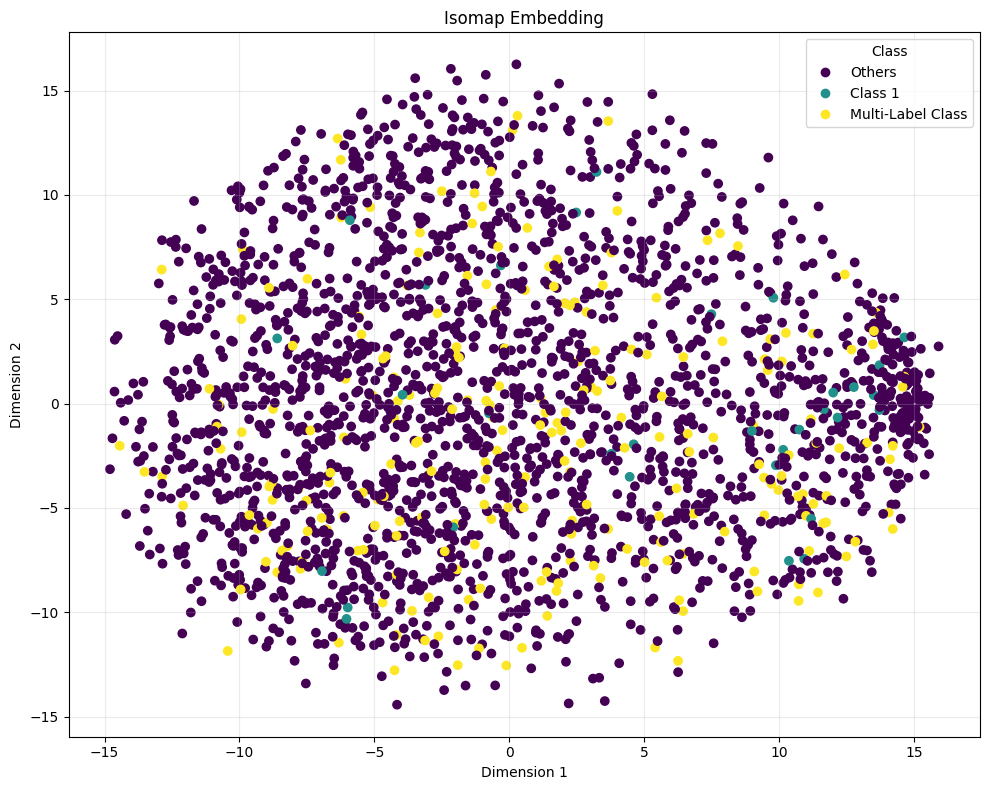

In [22]:
# Plot of the Isomap embedding.

fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(X_isomap[:,0], X_isomap[:,1], c=y_new) # color by simplified labels
ax.set_title("Isomap Embedding") #  title
ax.set_xlabel("Dimension 1") # x-axis labels
ax.set_ylabel("Dimension 2") # y-axis labels
ax.grid(alpha=0.25) # grid

ax.legend(handles, labels_str, title="Class", loc="best")  # legend 
plt.tight_layout()
plt.show()

### Question 3 : Comparison and Curvature

- Compare the Isomap visualization to the t-SNE visualization. Which one is better at revealing the **global structure** of the gene expression data?
- Discuss the concept of the **data manifold**. Does the Isomap plot suggest a highly curved or complex manifold? How does the complexity of this manifold relate to the difficulty of
classification?

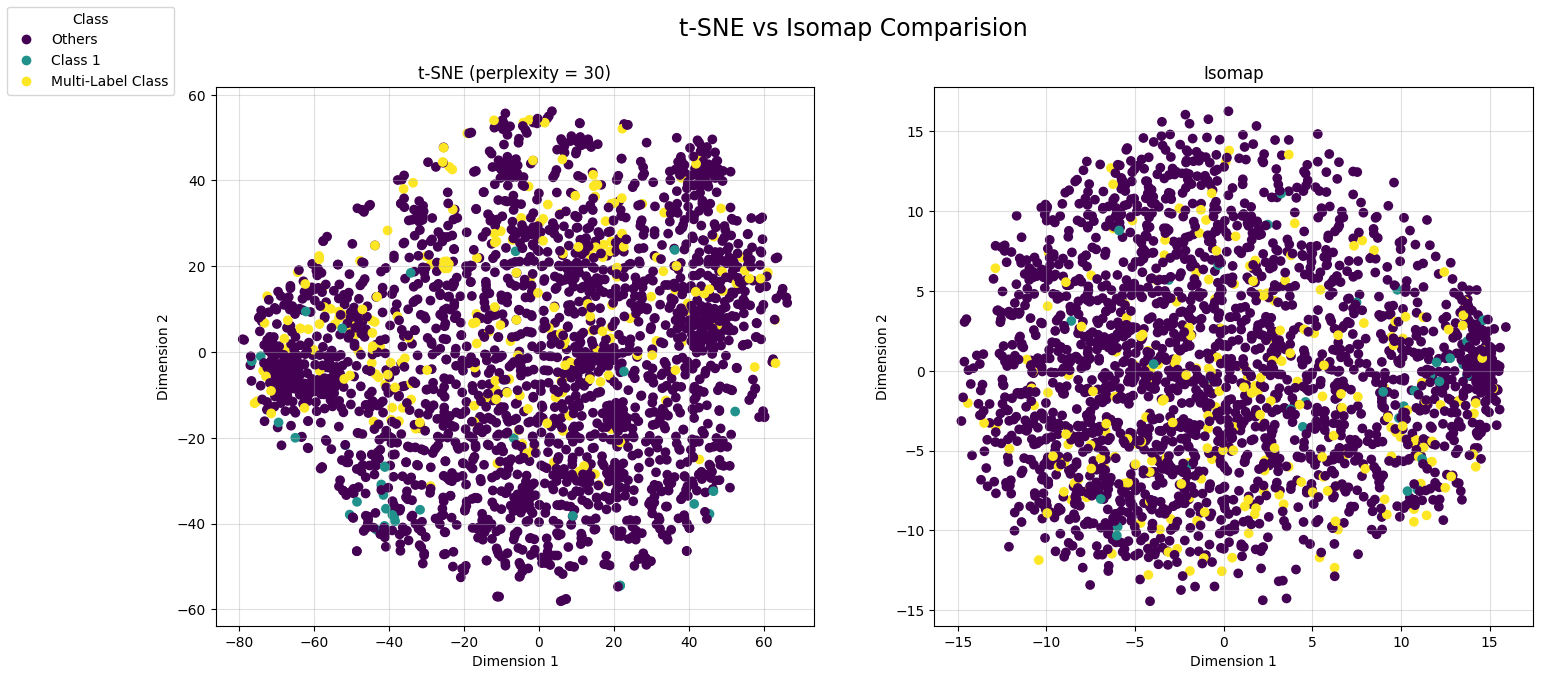

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17,7))
plt.suptitle("t-SNE vs Isomap Comparision", fontsize=17)

ax[0].scatter(tsne_trans[idx][:,0], tsne_trans[idx][:,1], c = y_new)
ax[0].set_title("t-SNE (perplexity = 30)")
ax[0].set_xlabel("Dimension 1")
ax[0].set_ylabel("Dimension 2")
ax[0].grid(alpha=0.4)

ax[1].scatter(X_isomap[:,0], X_isomap[:,1], c=y_new)
ax[1].set_title("Isomap")
ax[1].set_xlabel("Dimension 1")
ax[1].set_ylabel("Dimension 2")
ax[1].grid(alpha=0.4)

fig.legend(handles, labels_str, title="Class", loc="upper left")
plt.show()

- Isomap is better for global structure because it preserves geodesic distances on a k-NN graph.  
- t-SNE focuses on local neighborhoods, so global spacing and cluster sizes are not reliable.  
- The Isomap plot shows a single connected cloud with a smooth, oval layout, indicating a coherent global geometry.  
- The colors are interleaved across the map, so the classes are not globally separable in the feature space.  
- The manifold appears continuous with moderate curvature, not highly folded or broken into multiple lobes.  
- The main difficulty for classification arises from overlapping labels on the same manifold and a heterogeneous “Other” class, not from extreme curvature.  
- Simple models would struggle in mixed neighborhoods; effective approaches require non-linear boundaries and awareness of label correlations.

## Conclusion

- The analysis **standardized** features, **consolidated** labels for readable plots, and applied **t-SNE**, **PCA**, and **Isomap** to inspect structure.
- The dataset shows **intrinsic overlap** in which labels are **interleaved** across the manifold despite careful scaling and tuning.
- Only **one** single-label class appears (Class 1 with 32 rows). The second **single-label** bucket is **absent**.
- There are **many** multi-label combinations (198 distinct), and the **TopMulti** pattern is **highly frequent**, confirming strong **co-annotation**.
- **t-SNE** with **perplexity = 30** offers a **stable** and **balanced** view and varying perplexity does **not** reveal clean class separation.
- **Isomap** yields a **globally coherent**, single manifold with **moderate curvature**, yet colors remain **mixed**.
- The findings support that the difficulty is **data-driven** (multi-label biology, class imbalance, heterogeneous “Other”), not a failure of **scaling** or **parameter choice**.